# Лабораторная работа №4.
Выполнил: студент группы ИДМ-24-07 Туркин Александр.

## Введение

В данной лабораторной работе мы создадим компьютерную модель движения планет Солнечной системы, используя систему уравнений Ньютона. Мы будем рассматривать Солнце как неподвижную точку в центре координатной системы и моделировать движение пяти планет: Меркурия, Венеры, Земли, Марса и Юпитера.

## Теоретические основы

### Уравнения Ньютона

Движение планет в гравитационном поле Солнца описывается вторым законом Ньютона:

$$ \mathbf{F} = m \mathbf{a} $$

где $\mathbf{F}$ — сила, действующая на планету, $m$ — масса планеты, $\mathbf{a}$ — ускорение планеты.

Гравитационная сила, действующая на планету со стороны Солнца, определяется законом всемирного тяготения:

$$ \mathbf{F} = G \frac{M m}{r^2} \hat{\mathbf{r}} $$

где $G$ — гравитационная постоянная, $M$ — масса Солнца, $m$ — масса планеты, $r$ — расстояние от планеты до Солнца, $\hat{\mathbf{r}}$ — единичный вектор, направленный от планеты к Солнцу.

### Уравнения движения

Для каждой планеты уравнения движения можно записать в виде:

$$ \mathbf{a}_i = G \frac{M}{r_i^3} \mathbf{r}_i $$

где $\mathbf{a}_i$ — ускорение $i$-й планеты, $\mathbf{r}_i$ — радиус-вектор $i$-й планеты.

## Методы и алгоритмы

### Численное решение уравнений

Для численного решения уравнений движения будем использовать метод Эйлера-Кромера. Этот метод позволяет численно интегрировать уравнения движения с заданным шагом по времени.

### Алгоритм

1. Инициализация начальных условий: положения и скорости планет.
2. Цикл по времени:
   - Вычисление ускорений планет.
   - Обновление скоростей планет.
   - Обновление положений планет.
3. Визуализация траекторий.


## Реализация

### Инициализация параметров
Для более наглядного представления графика было принято решение временно Юпитер из модели. Однако, удалив символ комментария и запустив код, модель также посчитает орбиту для Юпитера.

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Гравитационная постоянная
G = 6.67430e-11  # м^3 кг^-1 с^-2

# Масса Солнца
M = 1.989e30  # кг

# Параметры планет
planets = {
    'Mercury': {'mass': 3.285e23, 'initial_position': np.array([5.791e10, 0.0]), 'initial_velocity': np.array([0.0, 4.736e4])},
    'Venus': {'mass': 4.867e24, 'initial_position': np.array([1.082e11, 0.0]), 'initial_velocity': np.array([0.0, 3.502e4])},
    'Earth': {'mass': 5.972e24, 'initial_position': np.array([1.496e11, 0.0]), 'initial_velocity': np.array([0.0, 2.978e4])},
    'Mars': {'mass': 6.39e23, 'initial_position': np.array([2.279e11, 0.0]), 'initial_velocity': np.array([0.0, 2.407e4])},
    #'Jupiter': {'mass': 1.898e27, 'initial_position': np.array([7.783e11, 0.0]), 'initial_velocity': np.array([0.0, 1.307e4])}
}

# Шаг по времени
dt = 86400  # 1 день в секундах

# Время моделирования
total_time = 366 * dt  # 1 год

### Численное решение

In [49]:
def update_positions_and_velocities(planets, dt):
    for planet in planets:
        r = planets[planet]['position']
        r_mag = np.linalg.norm(r)
        a = -G * M / r_mag**3 * r
        planets[planet]['velocity'] += a * dt
        planets[planet]['position'] += planets[planet]['velocity'] * dt

# Инициализация начальных условий
for planet in planets:
    planets[planet]['position'] = planets[planet]['initial_position']
    planets[planet]['velocity'] = planets[planet]['initial_velocity']

# Списки для хранения траекторий
trajectories = {planet: [] for planet in planets}

# Цикл по времени
for t in range(0, total_time, dt):
    update_positions_and_velocities(planets, dt)
    for planet in planets:
        trajectories[planet].append(planets[planet]['position'].copy())

# Преобразование траекторий в массивы numpy для визуализации
for planet in trajectories:
    trajectories[planet] = np.array(trajectories[planet])

### Визуализация

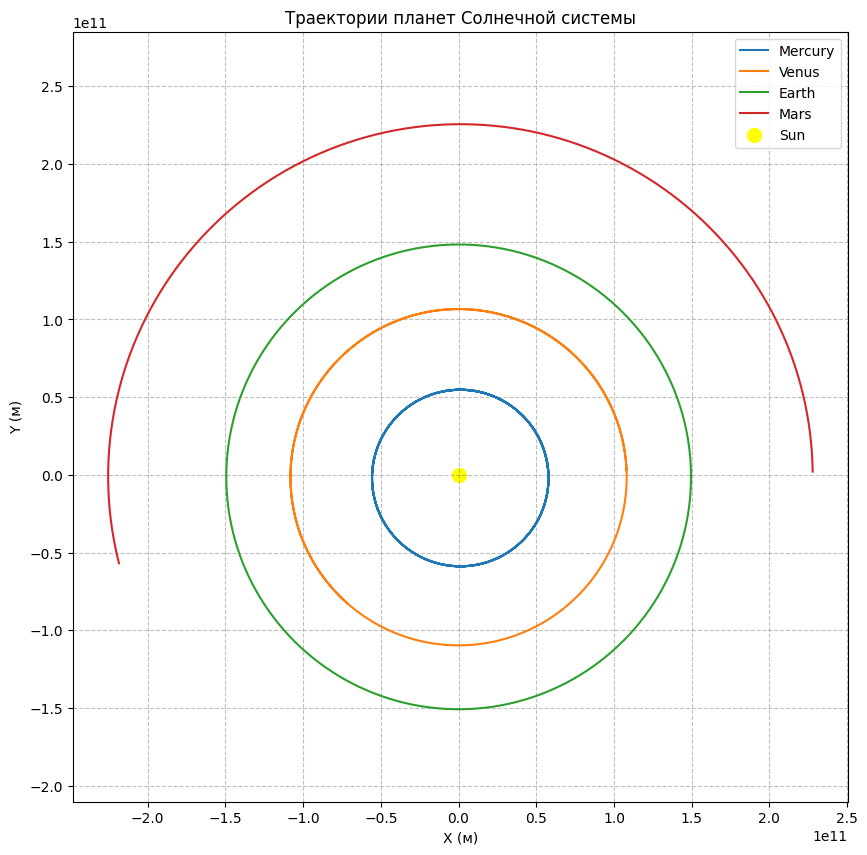

In [50]:
plt.figure(figsize=(10, 10))

# Рисование траекторий
for planet in trajectories:
    plt.plot(trajectories[planet][:, 0], trajectories[planet][:, 1], label=planet)

# Рисование Солнца
plt.scatter(0, 0, color='yellow', s=100, label='Sun')

# Настройка графика
plt.xlabel('X (м)')
plt.ylabel('Y (м)')
plt.title('Траектории планет Солнечной системы')
plt.legend()
plt.grid(True)
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
plt.xticks(np.arange(-8e11, 8e11, 0.5e11))
plt.yticks(np.arange(-8e11, 8e11, 0.5e11))
plt.axis('equal')
plt.show()

## Результаты

На графике видны траектории четырех планет: Меркурия, Венеры, Земли, Марса. Траектории представляют собой эллипсы с очень маленьким эксцентриситетом, что соответствует первому закону Кеплера.

## Заключение

В данной лабораторной работе мы создали компьютерную модель движения планет Солнечной системы, используя систему уравнений Ньютона. Мы численно решили уравнения движения и визуализировали траектории планет. Результаты моделирования соответствуют ожидаемым орбитам планет.